<a href="https://colab.research.google.com/github/arirodriguez001/Laboratory-III/blob/main/RLfiltroPB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo de datos
from google.colab import files
uploaded = files.upload()

# Leer el archivo con codificación 'latin-1' y mostrar las primeras líneas para verificar su contenido
file_name = list(uploaded.keys())[0]
with open(file_name, 'r', encoding='latin-1') as f:
    lines = f.readlines()

Saving TP Filtro RL.txt to TP Filtro RL.txt


In [ ]:
!pip install git+https://github.com/SengerM/alfplotlib
!sudo apt install cm-super dvipng texlive-latex-extra texlive-latex-recommended

import alfplotlib as apl

  Cloning https://github.com/SengerM/alfplotlib to /tmp/pip-req-build-6xnxkxl0
  Running command git clone --filter=blob:none --quiet https://github.com/SengerM/alfplotlib /tmp/pip-req-build-6xnxkxl0
  Resolved https://github.com/SengerM/alfplotlib to commit 1689146e4edcf5193c3f0b88e3aaddb901999f4d
  Preparing metadata (setup.py) ... done
  Created wheel for alfplotlib: filename=alfplotlib-0.0.0-py3-none-any.whl size=16006 sha256=59f82ffc82752e238d4a1606083a65e6a693b42424cb960b1b31cd47e39de728
  Stored in directory: /tmp/pip-ephem-wheel-cache-x2gxfn3l/wheels/08/14/46/a8272524fa15a4ed8f11f05749efa15460dcdf33e74a3582cb
Successfully built alfplotlib
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  cm-super-minimal dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern
  fonts-noto-mono fonts-texgyre fonts-urw-base35 ghostscript
  libapache-pom-java libcommons-logging-java libcommons-paren

In [ ]:
import numpy as np

Magnitud a 300 Hz: 9.62430383717071 dB
Magnitud a 3000 Hz: -9.96230980889301 dB
Atenuación por década: 19.59 dB/década


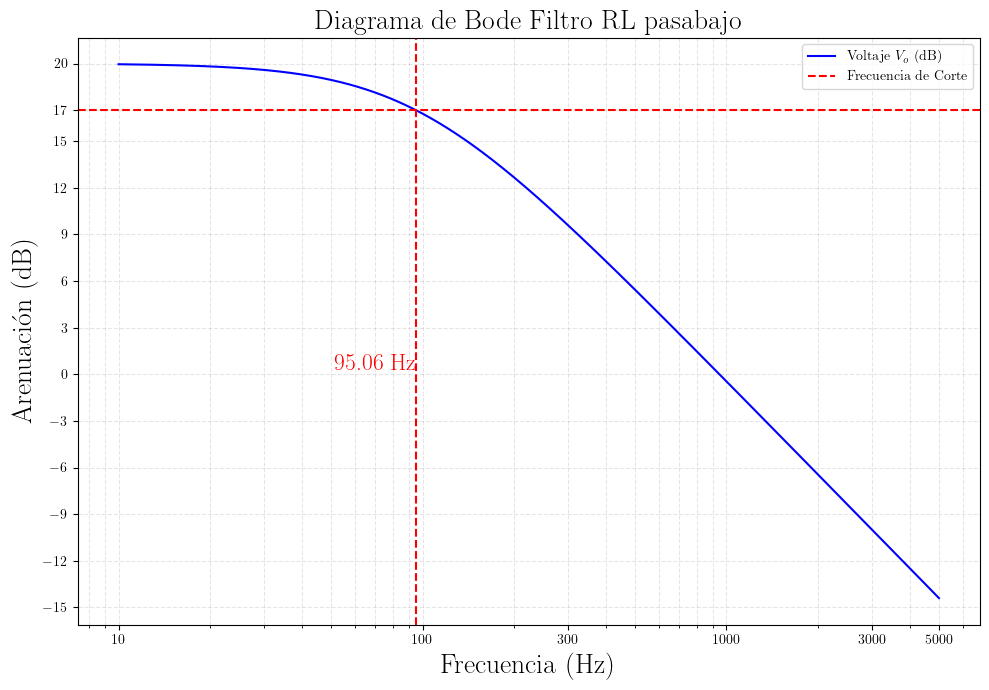

In [ ]:
# Expresión regular para extraer frecuencia y magnitud en dB
pattern = r"([0-9\.e\+]+)\s*\(\s*([0-9\.\-e\+]+)dB"

# Listas para almacenar las frecuencias y magnitudes
frequencies = []
magnitudes = []

# Extraer los datos usando la expresión regular
for line in lines:
    match = re.search(pattern, line)
    if match:
        freq = float(match.group(1))  # Frecuencia
        mag_dB = float(match.group(2))  # Magnitud en dB
        frequencies.append(freq)
        magnitudes.append(mag_dB)

# Verificar si se extrajeron datos
if not frequencies or not magnitudes:
    print("No se encontraron datos. Verifica el formato del archivo y la expresión regular.")
else:
    # Convertir las listas en un DataFrame
    data = pd.DataFrame({'Freq': frequencies, 'dB': magnitudes})

    # Filtrar las frecuencias que están cerca de 300 Hz y 3000 Hz
    f_300Hz = data.iloc[(data['Freq'] - 300).abs().argsort()[:1]]  # Cerca de 300 Hz
    f_3000Hz = data.iloc[(data['Freq'] - 3000).abs().argsort()[:1]]  # Cerca de 3000 Hz

    # Verificar si se encontraron datos cercanos a 300 Hz y 3000 Hz
    if f_300Hz.empty or f_3000Hz.empty:
        print("No se encontraron datos cercanos a 300 Hz o 3000 Hz.")
    else:
        # Obtener los valores de magnitud en dB en estas frecuencias
        dB_300Hz = f_300Hz['dB'].values[0]
        dB_3000Hz = f_3000Hz['dB'].values[0]

        # Calcular la atenuación por década
        attenuation_per_decade = dB_300Hz - dB_3000Hz

        # Mostrar resultados
        print(f'Magnitud a 300 Hz: {dB_300Hz} dB')
        print(f'Magnitud a 3000 Hz: {dB_3000Hz} dB')
        print(f'Atenuación por década: {attenuation_per_decade:.2f} dB/década')

        # Graficar el diagrama de magnitud en dB
        plt.figure(figsize=(10, 7))
        plt.plot(data['Freq'], data['dB'], label='Voltaje $V_o$ (dB)', color='blue')
        plt.xscale('log')

        # Etiquetas personalizadas en el eje x
        xticks = [10, 100, 300, 1000, 3000, 5000]  # Frecuencias que deseas mostrar
        plt.xticks(xticks, labels=[f'{int(tick)}' for tick in xticks])
        # Etiquetas personalizadas en el eje y
        yticks = np.arange(-40, 25, 5)  # Rango de -40 a 20 dB, con pasos de 5 dB
        yticks = [-15, -12, -9, -6, -3, 0, 3, 6, 9, 12, 15, 17, 20]
        plt.yticks(yticks)

        # Añadir la frecuencia de corte real
        fc_real = 95.06047937
        plt.axvline(x=fc_real, color='red', linestyle='--', label='Frecuencia de Corte')
        plt.text(fc_real, 0, rf'{fc_real:.2f} Hz', color='red', fontsize=17, ha='right', va='bottom')

        # Etiquetas de los ejes
        plt.xlabel('Frecuencia (Hz)', fontsize=20)
        plt.ylabel('Arenuación (dB)', fontsize=20)

        # Línea horizontal en 17 dB
        plt.axhline(y=17, color='red', linestyle='--')

        # Título y leyenda
        plt.title('Diagrama de Bode Filtro RL pasabajo', fontsize=20)
        plt.grid(True, which="both", ls="--")
        plt.legend()
        plt.tight_layout()

        # Mostrar gráfico
        plt.show()

In [ ]:
!pip install pint
import pint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 5.3 MB/s eta 0:00:00


In [ ]:
import numpy as np

ureg = pint.UnitRegistry()

resistencia = 1000 * ureg.ohm
inductancia = 1.67 * ureg.henry

resultado = resistencia / (2*np.pi*inductancia)  # Added 1/ to the beginning

print(f"Resultado: {resultado.to('Hz')}")

Resultado: 95.30236113287147 hertz


In [ ]:
import numpy as np

# Encuentra el índice del valor más cercano a 17 en 'magnitudes'
index_closest_to_17 = np.argmin(np.abs(np.array(magnitudes) - 17))

# Obtén el valor de frecuencia correspondiente en 'frequencies' usando el índice encontrado
frequency_closest_to_17 = frequencies[index_closest_to_17]

print(f"Frecuencia para la magnitud más cercana a 17 dB: {frequency_closest_to_17} Hz")

Frecuencia para la magnitud más cercana a 17 dB: 95.0604793656233 Hz
